<a href="https://colab.research.google.com/github/vijaygwu/algorithms/blob/main/973_K_Closest_Points_to_Origin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given an array of points where points[i] = [xi, yi] represents a point on the X-Y plane and an integer k, return the k closest points to the origin (0, 0).

The distance between two points on the X-Y plane is the Euclidean distance (i.e., √(x1 - x2)2 + (y1 - y2)2).

You may return the answer in any order. The answer is guaranteed to be unique (except for the order that it is in).



Example 1:

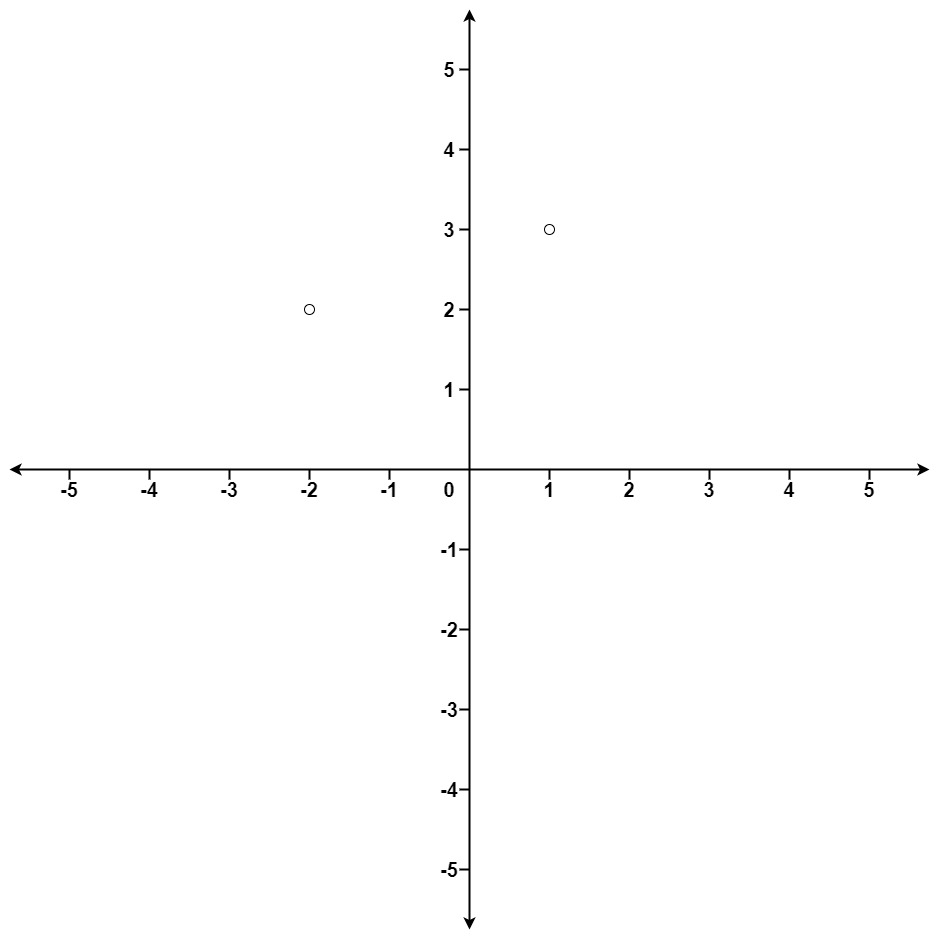

Input: points = [[1,3],[-2,2]], k = 1
Output: [[-2,2]]
Explanation:
The distance between (1, 3) and the origin is sqrt(10).
The distance between (-2, 2) and the origin is sqrt(8).
Since sqrt(8) < sqrt(10), (-2, 2) is closer to the origin.
We only want the closest k = 1 points from the origin, so the answer is just [[-2,2]].
Example 2:

Input: points = [[3,3],[5,-1],[-2,4]], k = 2
Output: [[3,3],[-2,4]]
Explanation: The answer [[-2,4],[3,3]] would also be accepted.


Constraints:

1 <= k <= points.length <= 104
-104 <= xi, yi <= 104

This is a solution to the problem of finding the K closest points to the origin (0, 0) in a 2D plane.

Let's break down the code step by step:

```python
from typing import List
```
- This imports the `List` type hint from the `typing` module, which allows for type annotation of lists.

```python
class Solution:
```
- This defines a class named `Solution` that contains methods to solve the problem of finding the K closest points.

```python
def kClosest(self, points: List[List[int]], k: int) -> List[List[int]]:
    # Sort the list with a custom comparator function
    points.sort(key=self.squared_distance)
   
    # Return the first k elements of the sorted list
    return points[:k]
```
- `kClosest` is the main method that takes two arguments:
  1. `points`: A list of points, where each point is a list of two integers [x, y]
  2. `k`: The number of closest points to return
- `points.sort(key=self.squared_distance)` does the following:
  - Sorts the `points` list in-place
  - Uses `self.squared_distance` as the key for sorting
  - This means points will be sorted based on their distance from the origin
- `return points[:k]` returns the first `k` points from the sorted list

```python
def squared_distance(self, point: List[int]) -> int:
    """Calculate and return the squared Euclidean distance."""
    return point[0] ** 2 + point[1] ** 2
```
- `squared_distance` is a helper method that calculates the squared Euclidean distance of a point from the origin (0, 0)
- It uses the formula: distance² = x² + y²
- Note that it uses squared distance to avoid the computational cost of taking a square root
- This method will be used as the sorting key

Here's an example of how this would work:
```python
solution = Solution()
points = [[1,3], [-2,2], [5,-1], [0,5]]
k = 2
closest_points = solution.kClosest(points, k)
# closest_points would be [[-2,2], [1,3]]
```

Key points about the implementation:
1. It uses Python's built-in `sort()` method with a custom key function
2. The sorting is done in-place, which is memory efficient
3. By using squared distance, it avoids the computationally expensive square root operation
4. Time complexity is O(n log n) due to sorting
5. Space complexity is O(1) as sorting is done in-place

The code elegantly solves the problem of finding the K closest points to the origin using a simple sorting approach.

In [2]:
from typing import List

class Solution:
   def kClosest(self, points: List[List[int]], k: int) -> List[List[int]]:
       # Sort the list with a custom comparator function
       points.sort(key=self.squared_distance)

       # Return the first k elements of the sorted list
       return points[:k]

   def squared_distance(self, point: List[int]) -> int:
       """Calculate and return the squared Euclidean distance."""
       return point[0] ** 2 + point[1] ** 2

This is an alternative solution to finding the K closest points to the origin using a min-heap approach.

```python
from typing import List
```
- This imports the `List` type hint from the `typing` module, allowing type annotation of lists.

```python
class SolutionMinHeap:
```
- Defines a class named `SolutionMinHeap` that implements the K closest points problem using a min-heap data structure.

```python
def kClosest(self, points: List[List[int]], k: int) -> List[List[int]]:
```
- The method takes two arguments:
  1. `points`: A list of points, where each point is a list of two integers [x, y]
  2. `k`: The number of closest points to return

```python
    minHeap = []
    for x, y in points:
      dist = (x ** 2) + (y ** 2)
      minHeap.append([dist, x, y])
```
- Creates an empty list `minHeap`
- Iterates through each point in `points`
- Calculates the squared distance from the origin for each point using the formula: distance² = x² + y²
- Appends a list `[distance, x, y]` to `minHeap`
  - The distance is the first element so that heapq can use it for sorting
  - Includes x and y coordinates to reconstruct the point later

```python
    heapq.heapify(minHeap)
```
- Converts the `minHeap` list into a heap data structure
- This operation takes O(n) time and ensures the heap property is maintained
- The smallest distance will always be at the top of the heap

```python
    res = []
    while k > 0:
      dist, x, y = heapq.heappop(minHeap)
      res.append([x, y])
      k -= 1
    return res
```
- Creates an empty result list `res`
- Enters a loop that runs `k` times
- In each iteration:
  1. `heapq.heappop()` removes and returns the smallest element from the heap
  2. Extracts the x and y coordinates
  3. Appends the point `[x, y]` to the result list
  4. Decrements `k`
- Returns the list of `k` closest points

Here's an example of how this would work:
```python
solution = SolutionMinHeap()
points = [[1,3], [-2,2], [5,-1], [0,5]]
k = 2
closest_points = solution.kClosest(points, k)
# closest_points would be [[-2,2], [1,3]]
```

Key differences from the previous sorting solution:
1. Uses a min-heap instead of sorting
2. Time complexity is O(n log k) instead of O(n log n)
   - More efficient when k is much smaller than n
3. Space complexity is O(n)
4. Allows for finding k closest points without fully sorting the entire list

Algorithmic advantages:
- More efficient for large datasets
- Particularly useful when you only need the k smallest elements
- Maintains the heap property dynamically



In [6]:
from typing import List
import heapq

class SolutionMinHeap:
  def kClosest(self, points: List[List[int]], k: int) -> List[List[int]]:
    minHeap = []
    for x, y in points:
      dist = (x ** 2) + (y ** 2)
      minHeap.append([dist, x, y])
    heapq.heapify(minHeap)
    res = []
    while k > 0:
      dist, x, y = heapq.heappop(minHeap)
      res.append([x, y])
      k -= 1
    return res


In [7]:
# Test function to demonstrate both solutions
def test_k_closest_points():
    # Test cases
    test_cases = [
        {
            'points': [[1,3], [-2,2], [5,-1], [0,5]],
            'k': 2,
            'description': 'Mixed positive and negative coordinates'
        },
        {
            'points': [[3,3], [5,-1], [-2,4]],
            'k': 1,
            'description': 'Finding closest single point'
        },
        {
            'points': [[0,0], [1,1], [2,2], [3,3]],
            'k': 3,
            'description': 'Points near origin'
        }
    ]

    # Create instances of both solutions
    sorting_solution = Solution()
    heap_solution = SolutionMinHeap()

    # Run tests
    for i, test in enumerate(test_cases, 1):
        print(f"\nTest Case {i}: {test['description']}")
        print("Input Points:", test['points'])
        print("k:", test['k'])

        # Run sorting solution
        sorting_result = sorting_solution.kClosest(test['points'].copy(), test['k'])
        print("Sorting Solution Result:", sorting_result)

        # Run min heap solution
        heap_result = heap_solution.kClosest(test['points'].copy(), test['k'])
        print("Min Heap Solution Result:", heap_result)

        # Verify results
        # Calculate squared distances for both results
        def get_squared_distances(points):
            return sorted([(x**2 + y**2, [x,y]) for x,y in points])

        sorting_distances = get_squared_distances(sorting_result)
        heap_distances = get_squared_distances(heap_result)

        print("Sorting Solution Distances:", sorting_distances)
        print("Min Heap Solution Distances:", heap_distances)

        # Check if results are equivalent
        assert sorting_distances == heap_distances, "Results do not match!"
        print("✓ Test case passed!")

# Run the tests
if __name__ == "__main__":
    test_k_closest_points()


Test Case 1: Mixed positive and negative coordinates
Input Points: [[1, 3], [-2, 2], [5, -1], [0, 5]]
k: 2
Sorting Solution Result: [[-2, 2], [1, 3]]
Min Heap Solution Result: [[-2, 2], [1, 3]]
Sorting Solution Distances: [(8, [-2, 2]), (10, [1, 3])]
Min Heap Solution Distances: [(8, [-2, 2]), (10, [1, 3])]
✓ Test case passed!

Test Case 2: Finding closest single point
Input Points: [[3, 3], [5, -1], [-2, 4]]
k: 1
Sorting Solution Result: [[3, 3]]
Min Heap Solution Result: [[3, 3]]
Sorting Solution Distances: [(18, [3, 3])]
Min Heap Solution Distances: [(18, [3, 3])]
✓ Test case passed!

Test Case 3: Points near origin
Input Points: [[0, 0], [1, 1], [2, 2], [3, 3]]
k: 3
Sorting Solution Result: [[0, 0], [1, 1], [2, 2]]
Min Heap Solution Result: [[0, 0], [1, 1], [2, 2]]
Sorting Solution Distances: [(0, [0, 0]), (2, [1, 1]), (8, [2, 2])]
Min Heap Solution Distances: [(0, [0, 0]), (2, [1, 1]), (8, [2, 2])]
✓ Test case passed!
